高度计作业：
1.概要梳理（形式不限，自己总结）
2.数据下载、作图
  五类数据对应5个图，注意图示信息的完整。
3.数据处理
  只用动力高度网格数据计算并作图
     ① 一年平均（1个图）
     ② 1、4、7、10月平均（4个图）
     ③ 任选一点在地图上标注，画出该点的时间序列（一年）（2个图）
     ④ 上述时间序列进行7-day，14-day低通滤波（2个图）
     ⑤ 空间滤波、计算波数普、频率谱、EOF分析不做强制要求，大家根据自己科研需要尽量完成。

第3部分数据处理需要附带提交计算程序，不限于Matlab，python、C++等都可以。10月31日前将作业打包（命名：姓名+学号）发邮箱chaohuang@qdio.ac.cn。

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


In [2]:
nf = nc.Dataset("C:/Users/HP/Desktop/nrt_global_al_phy_l3_20210207_20210228.nc",'r')


In [3]:
nf.variables.keys()

odict_keys(['time', 'longitude', 'latitude', 'cycle', 'track', 'dac', 'flag', 'lwe', 'mdt', 'ocean_tide', 'sla_filtered', 'sla_unfiltered'])

In [4]:
nf.variables['longitude']

<class 'netCDF4._netCDF4.Variable'>
int32 longitude(time)
    add_offset: 0.0
    long_name: Longitude of measurement
    scale_factor: 1.0000000000000002e-06
    standard_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (38523,)
filling on, default _FillValue of -2147483647 used

G:\20171027\anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
G:\20171027\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
G:\20171027\anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: `np.bool` is a deprecated alias for the buil

2
2
720
1440


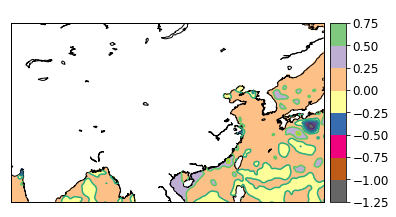

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc


file_path = "C:/Users/HP/Desktop/dataset-duacs-nrt-global-merged-allsat-phy-l4_1633063808153.nc"
file = nc.Dataset(file_path)


map = Basemap(projection = 'cyl',llcrnrlat = 15,urcrnrlat = 55,llcrnrlon = 70,urcrnrlon = 140,resolution = 'l')
map.drawmapboundary()
map.drawstates()
map.drawcoastlines()
lons,lats = map.makegrid(71,41)
lats = lats[::-1]
x,y = map(lons,lats)
#map.drawparallels(np.arange(5.,26.,5.),labels = [1,0,0,0],fontsize = 12)
#map.drawmeridians(np.arange(105.,126.,5.),labels = [0,0,0,1],fontsize = 12)
plt.title(' ')



time = (file.variables['time'][:])
sla = (file.variables['sla'][:])
lat = (file.variables['latitude'][:])
lon = (file.variables['longitude'][:])

data_lon = np.array(lon)
data_lat = np.array(lat)
data_time = np.array(time)
data_sla = np.array(sla)
print(len(data_sla))
print(len(time))
print(len(lat))
print(len(lon))
data_plt_sla = data_sla[0,:,:]

x,y = np.meshgrid(data_lon,data_lat)
curve = map.contour(x,y,data_plt_sla)
cmap_color = plt.cm.get_cmap("Accent_r")
shade = map.contourf(x,y,data_plt_sla,cmap = cmap_color)
cbar = map.colorbar()
cbar.ax.tick_params(labelsize = 12)
plt.show()


## 1013

In [32]:
from netCDF4 import Dataset
import netCDF4 as nc
file_path = "C:/Users/HP/Desktop/dataset-duacs-nrt-global-merged-allsat-phy-l4_1633063808153.nc"
file = nc.Dataset(file_path)

file.variables.keys()

odict_keys(['adt', 'time', 'latitude', 'longitude', 'ugos', 'vgos', 'sla'])

In [34]:
file['vgos']

<class 'netCDF4._netCDF4.Variable'>
float64 vgos(time, latitude, longitude)
    coordinates: time latitude longitude 
    grid_mapping: crs
    long_name: Absolute geostrophic velocity: meridian component
    standard_name: surface_geostrophic_northward_sea_water_velocity
    units: m/s
    _ChunkSizes: [ 1 50 50]
unlimited dimensions: 
current shape = (2, 720, 1440)
filling on, default _FillValue of 9.969209968386869e+36 used

In [3]:
file['vgos'][0,100,200]

G:\20171027\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


masked_array(data=-0.0956,
             mask=False,
       fill_value=1e+20)

In [4]:
file['vgos'][1,100,200]

G:\20171027\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


masked_array(data=-0.0977,
             mask=False,
       fill_value=1e+20)

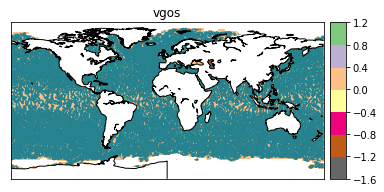

In [14]:
import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc

vgos = (file.variables['vgos'][0::])
lat = (file.variables['latitude'][:])
lon = (file.variables['longitude'][:])

data_lon = np.array(lon)
data_lat = np.array(lat)
data_vgos = np.array(vgos)
data_plt_vgos = data_vgos[0,:,:]

map = Basemap()

x,y = np.meshgrid(data_lon,data_lat)
curve = map.contour(x,y,data_plt_vgos)
cmap_color = plt.cm.get_cmap("Accent_r")
shade = map.contourf(x,y,data_plt_sla,cmap = cmap_color)
cbar = map.colorbar()


#map = Basemap(projection = 'cyl',llcrnrlat = 15,urcrnrlat = 55,llcrnrlon = 70,urcrnrlon = 140,resolution = 'l')
#map.drawmapboundary()
#map.drawstates()
map.drawcoastlines()

#map.drawparallels(np.arange(5.,26.,5.),labels = [1,0,0,0],fontsize = 12)
#map.drawmeridians(np.arange(105.,126.,5.),labels = [0,0,0,1],fontsize = 12)
plt.title('vgos')
plt.show()

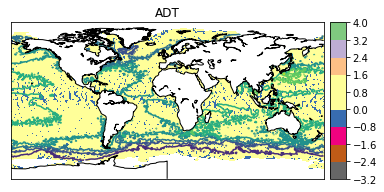

In [10]:
import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc


adt = (file.variables['adt'][:])
lat = (file.variables['latitude'][:])
lon = (file.variables['longitude'][:])

data_lon = np.array(lon)
data_lat = np.array(lat)
data_adt = np.array(adt)
data_plt_adt = data_adt[0,:,:]


map = Basemap()
x,y = np.meshgrid(data_lon,data_lat)
curve = map.contour(x,y,data_plt_adt)
cmap_color = plt.cm.get_cmap("Accent_r")
shade = map.contourf(x,y,data_plt_sla,cmap = cmap_color)
cbar = map.colorbar()


#map = Basemap(projection = 'cyl',llcrnrlat = 15,urcrnrlat = 55,llcrnrlon = 70,urcrnrlon = 140,resolution = 'l')
#map.drawmapboundary()
#map.drawstates()
map.drawcoastlines()

#map.drawparallels(np.arange(5.,26.,5.),labels = [1,0,0,0],fontsize = 12)
#map.drawmeridians(np.arange(105.,126.,5.),labels = [0,0,0,1],fontsize = 12)
plt.title('ADT')
plt.show()

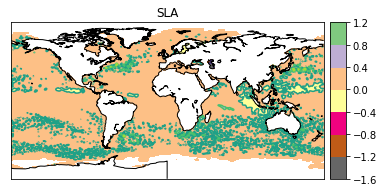

In [12]:
import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc


sla = (file.variables['sla'][:])
lat = (file.variables['latitude'][:])
lon = (file.variables['longitude'][:])

data_lon = np.array(lon)
data_lat = np.array(lat)
data_sla = np.array(sla)
data_plt_sla = data_sla[0,:,:]

map = Basemap()

x,y = np.meshgrid(data_lon,data_lat)
curve = map.contour(x,y,data_plt_sla)
cmap_color = plt.cm.get_cmap("Accent_r")
shade = map.contourf(x,y,data_plt_sla,cmap = cmap_color)
cbar = map.colorbar()


#map = Basemap(projection = 'cyl',llcrnrlat = 15,urcrnrlat = 55,llcrnrlon = 70,urcrnrlon = 140,resolution = 'l')
#map.drawmapboundary()
#map.drawstates()
map.drawcoastlines()

#map.drawparallels(np.arange(5.,26.,5.),labels = [1,0,0,0],fontsize = 12)
#map.drawmeridians(np.arange(105.,126.,5.),labels = [0,0,0,1],fontsize = 12)
plt.title('SLA')
plt.show()

## 
## along track

In [36]:
file_path = "C:/Users/HP/Desktop/nrt_global_al_phy_l3_20210207_20210228.nc"
file = nc.Dataset(file_path)

file.variables.keys()

odict_keys(['time', 'longitude', 'latitude', 'cycle', 'track', 'dac', 'flag', 'lwe', 'mdt', 'ocean_tide', 'sla_filtered', 'sla_unfiltered'])

In [37]:
file.variables['latitude'].shape

(38523,)

ValueError: zero-size array to reduction operation maximum which has no identity

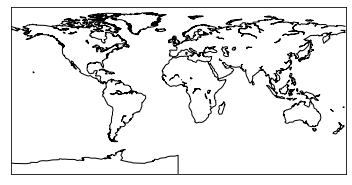

In [38]:
import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc


sla = (file.variables['sla_filtered'][:])
lat = (file.variables['latitude'][:])
lon = (file.variables['longitude'][:])

data_lon = np.array(lon)
data_lat = np.array(lat)
data_sla = np.array(sla)
#data_plt_sla = data_sla[0,:,:]
data_plt_sla = data_sla[:]

#x,y = np.meshgrid(data_lon,data_lat)
#curve = map.contour(x,y,data_plt_sla)


#cmap_color = plt.cm.get_cmap("Accent_r")
#shade = map.contourf(x,y,data_plt_sla,cmap = cmap_color)
#cbar = map.colorbar()
#plt.figure (figsize= (16,16))
map = Basemap()
#map = Basemap(projection = 'cyl',llcrnrlat = 15,urcrnrlat = 55,llcrnrlon = 70,urcrnrlon = 140,resolution = 'l')
#map.drawmapboundary()
#map.drawstates()
map.drawcoastlines()


cm = plt.cm.get_cmap('Accent_r')
#sc = plt.scatter(xy, xy, c=z, vmin=0, vmax=20, s=35, cmap=cm)

#map.scatter(data_lon,data_lat,s=16,cmap=cm)


for i in range(len(data_plt_sla)):
    
    
    x,y = np.meshgrid(data_lon[i],data_lat[i])
    curve = map.contour(x,y,data_plt_sla[i])
    cmap_color = plt.cm.get_cmap("Accent_r")
    shade = map.contourf(x,y,data_plt_sla[i],cmap = cmap_color)
cbar = map.colorbar()

map.colorbar()
#map.drawparallels(np.arange(5.,26.,5.),labels = [1,0,0,0],fontsize = 12)
#map.drawmeridians(np.arange(105.,126.,5.),labels = [0,0,0,1],fontsize = 12)
plt.title('ALONG TRACK SLA')
plt.show()

In [21]:
file.variables['mdt']

<class 'netCDF4._netCDF4.Variable'>
int16 mdt(time)
    _FillValue: 32767
    add_offset: 0.0
    comment: The mean dynamic topography is the sea surface height above geoid; it is used to compute the absolute dynamic tyopography adt=sla+mdt
    coordinates: longitude latitude
    long_name: Mean dynamic topography
    scale_factor: 0.001
    standard_name: sea_surface_height_above_geoid
    units: m
unlimited dimensions: 
current shape = (38523,)
filling on

adt = sla + mdt

(38523,)


ValueError: 'c' argument has 720 elements, which is not acceptable for use with 'x' with size 38523, 'y' with size 38523.

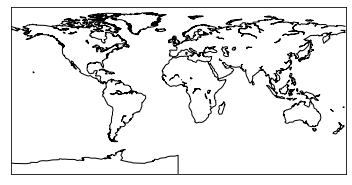

In [27]:
import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc


sla = (file.variables['sla_filtered'][:])
mdt = (file.variables['mdt'][:])
lat = (file.variables['latitude'][:])
lon = (file.variables['longitude'][:])

data_lon = np.array(lon)
data_lat = np.array(lat)
data_sla = np.array(sla)
data_mdt = np.array(mdt)
#data_plt_sla = data_sla[0,:,:]
data_plt = data_sla[:] + data_mdt[:]

#x,y = np.meshgrid(data_lon,data_lat)
#curve = map.contour(x,y,data_plt_sla)


#cmap_color = plt.cm.get_cmap("Accent_r")
#shade = map.contourf(x,y,data_plt_sla,cmap = cmap_color)
#cbar = map.colorbar()
#plt.figure (figsize= (16,16))
map = Basemap()
#map = Basemap(projection = 'cyl',llcrnrlat = 15,urcrnrlat = 55,llcrnrlon = 70,urcrnrlon = 140,resolution = 'l')
#map.drawmapboundary()
#map.drawstates()
map.drawcoastlines()

norm = plt.Normalize(data_plt.min(), data_plt.max())
# matplotlib.colors.Normalize 对象，可以作为参数传入到绘图方法里
# 也可给其传入数值直接计算归一化的结果
norm_y = norm(y)
cm = plt.cm.get_cmap('Accent_r')
#sc = plt.scatter(xy, xy, c=z, vmin=0, vmax=20, s=35, cmap=cm)


map.scatter(data_lon,
           data_lat,
           s=16,
           c = cm(norm_y))

map.colorbar()
#map.drawparallels(np.arange(5.,26.,5.),labels = [1,0,0,0],fontsize = 12)
#map.drawmeridians(np.arange(105.,126.,5.),labels = [0,0,0,1],fontsize = 12)
plt.title('ALONG TRACK SLA')
plt.show()